## Images

In [1]:
import imageio
from skimage.transform import resize

In [2]:
cat_img = imageio.imread("data/images/house-1.png")

In [3]:
cat_img.shape

(1080, 1920, 4)

In [4]:
import torch

In [5]:
cat_img_tensor = torch.from_numpy(cat_img)

In [6]:
cat_img_tensor.shape

torch.Size([1080, 1920, 4])

In [7]:
# change layout to channels, height, width
cat_img_tensor = cat_img_tensor.permute(2, 0, 1)

In [8]:
cat_img_tensor.shape

torch.Size([4, 1080, 1920])

In [9]:
import os

In [10]:
images_dir = "data/images/"

In [11]:
# create a tensor to accomodate a predefined batch of Images
batch_size = len(os.listdir(images_dir))
img_batch = torch.zeros(size=(batch_size, 3, 256, 256), dtype=torch.uint8)

In [12]:
filepaths = [os.path.join(images_dir, name) for name in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, name))]

In [13]:
# build a pipeline and load the images into the precreated image batch
for i, path in enumerate(filepaths):
    img_arr = imageio.imread(path)
    img_arr = resize(img_arr, (256, 256), preserve_range=True)
    img_tensor = torch.from_numpy(img_arr)
    img_tensor = img_tensor.permute(2, 0, 1)
    img_tensor = img_tensor[:3] # ignore the remaining channels if there are more than three
    img_batch[i] = img_tensor

In [14]:
img_batch.shape

torch.Size([2, 3, 256, 256])

##### Plot images from batch

In [15]:
import matplotlib.pyplot as plt

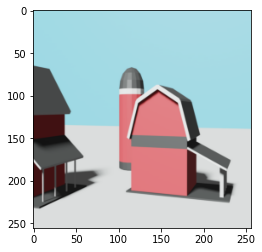

In [16]:
plt.imshow(img_batch[1].permute(1, 2, 0))

#### Normalize the batch wrt each channel

In [17]:
img_batch.shape

torch.Size([2, 3, 256, 256])

In [18]:
img_batch[:, 0].shape

torch.Size([2, 256, 256])

In [19]:
img_batch = img_batch.to(dtype=torch.float32)
n_channels = img_batch.shape[1]
for channel in range(n_channels):
    channel_mean = torch.mean(img_batch[:, channel])
    channel_std = torch.std(img_batch[:, channel])
    img_batch[:, channel] = (img_batch[:, channel] - channel_mean) / channel_std

## CT Scan Data

In [ ]:
import imageio
import torch

In [ ]:
images_dir = "volumetric-dicom/2-LUNG 3.0  B70f-04083/"

In [ ]:
vol_arr = imageio.volread(images_dir, 'DICOM')

In [ ]:
vol_arr.shape # n_images, n_cols, n_rows (or n_rows, n_cols)

In [ ]:
vol_tensor = torch.from_numpy(vol_arr)

In [ ]:
vol_tensor = vol_tensor.float()

In [ ]:
# add the channel dimension
vol_tensor = torch.unsqueeze(vol_tensor, 0)

In [ ]:
vol_tensor.shape # n_channels, n_images, n_cols, n_rows (or n_rows, n_cols)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(vol_tensor[0][50], cmap='gray')

## Tabular Data

In [20]:
import pandas as pd
import seaborn as sns

In [21]:
df = pd.read_csv("data/tabular-wine//winequality-white.csv", sep=";")

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

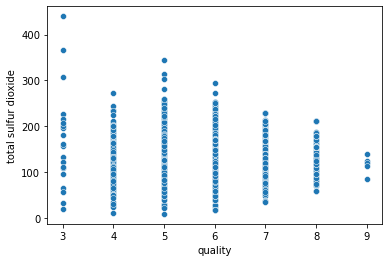

In [23]:
sns.scatterplot(data=df, y="total sulfur dioxide", x="quality")

In [24]:
df.shape

(4898, 12)

In [25]:
unique_scores = df["quality"].unique()

In [26]:
unique_scores

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [27]:
unique_scores.shape

(7,)

In [28]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [29]:
df_tensor = torch.from_numpy(df.values).float()

In [30]:
df_tensor.shape

torch.Size([4898, 12])

In [31]:
input_data = df_tensor[:, :-1]

In [32]:
labels = df_tensor[:, -1]

In [33]:
labels = labels.to(dtype=torch.int64)

In [34]:
labels_one_hot_enc = torch.zeros(labels.shape[0], 10)

In [35]:
labels_one_hot_enc.scatter_(1, labels.unsqueeze(1), 1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

##### Normalize the Input Data

In [36]:
input_data_mean = torch.mean(input_data, 0)

In [37]:
input_data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [38]:
input_data_var = torch.var(input_data, 0)

In [39]:
input_data = (input_data - input_data_mean) / torch.sqrt(input_data_var)

## Time Series

In [40]:
import pandas as pd
import numpy as np
import torch

In [41]:
df = pd.read_csv("data/bike-sharing-dataset/hour-fixed.csv", delimiter=",")

In [42]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [43]:
df["dteday"] = df["dteday"].map(lambda x: float(x[8:10]))

In [44]:
df = df.astype(np.float32)

In [45]:
df.values

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 3.0000e+00, 1.3000e+01,
        1.6000e+01],
       [2.0000e+00, 1.0000e+00, 1.0000e+00, ..., 8.0000e+00, 3.2000e+01,
        4.0000e+01],
       [3.0000e+00, 1.0000e+00, 1.0000e+00, ..., 5.0000e+00, 2.7000e+01,
        3.2000e+01],
       ...,
       [1.7377e+04, 3.1000e+01, 1.0000e+00, ..., 7.0000e+00, 8.3000e+01,
        9.0000e+01],
       [1.7378e+04, 3.1000e+01, 1.0000e+00, ..., 1.3000e+01, 4.8000e+01,
        6.1000e+01],
       [1.7379e+04, 3.1000e+01, 1.0000e+00, ..., 1.2000e+01, 3.7000e+01,
        4.9000e+01]], dtype=float32)

In [46]:
bikes_data_tensor = torch.from_numpy(df.values)

In [47]:
bikes_data_tensor_cont = bikes_data_tensor.contiguous()

In [48]:
bikes_data_tensor_cont.storage()[:17]

 1.0
 1.0
 1.0
 0.0
 1.0
 0.0
 0.0
 6.0
 0.0
 1.0
 0.23999999463558197
 0.28790000081062317
 0.8100000023841858
 0.0
 3.0
 13.0
 16.0
[torch.FloatStorage of size 17]

In [49]:
bikes_data_tensor_cont.shape, bikes_data_tensor_cont.stride()

(torch.Size([17520, 17]), (17, 1))

In [50]:
daily_bikes = bikes_data_tensor_cont.view(-1, 24, bikes_data_tensor_cont.shape[1])

In [51]:
daily_bikes.shape # n_samples, sequence_length, data_point 

torch.Size([730, 24, 17])

In [52]:
daily_bikes.stride() # to move from one sequence to another sequence in storage, we move 17*24=408 indices
                     # to move from one data point to another data point within a sequence, we move 17 indices
                     # to move from one column to another column within a datapoint, we move 1 index

(408, 17, 1)

In [53]:
daily_bikes = daily_bikes.transpose(1, 2)

In [54]:
daily_bikes.shape

torch.Size([730, 17, 24])

In [56]:
first_day_data = df[:24]

In [57]:
first_day_tensor = torch.from_numpy(first_day_data.values).long()

In [58]:
weather_oneshot = torch.zeros(first_day_tensor.shape[0], 4)

In [59]:
weather_oneshot

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [60]:
weather_indices = first_day_tensor[:, 9]

In [61]:
weather_indices = weather_indices.unsqueeze(1)

In [62]:
weather_indices -= 1

In [63]:
weather_indices

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [2],
        [2],
        [1],
        [1],
        [1],
        [1]])

In [64]:
weather_oneshot.scatter_(1, weather_indices, 1)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [65]:
torch.cat((first_day_tensor, weather_oneshot), 1)[1]

tensor([ 2.,  1.,  1.,  0.,  1.,  1.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,
         8., 32., 40.,  1.,  0.,  0.,  0.])

In [66]:
first_day_tensor.shape, weather_oneshot.shape

(torch.Size([24, 17]), torch.Size([24, 4]))

In [67]:
weather_onehot_sequence = torch.zeros(daily_bikes.shape[0], 4, daily_bikes.shape[2])

In [68]:
weather_onehot_sequence.shape

torch.Size([730, 4, 24])

In [69]:
weather_onehot_sequence

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0

In [70]:
weather_onehot_sequence.scatter_(1, daily_bikes[:, 9, :].long().unsqueeze(1) - 1, 1)

tensor([[[1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0

In [71]:
daily_bikes_onehot = torch.cat((daily_bikes, weather_onehot_sequence), 1)

In [72]:
daily_bikes.shape, weather_onehot_sequence.shape

(torch.Size([730, 17, 24]), torch.Size([730, 4, 24]))

In [73]:
daily_bikes_onehot.shape

torch.Size([730, 21, 24])

In [74]:
# treating weather data as ordinal and normalizing it
daily_bikes[:, 9, :] = (daily_bikes[:, 9, :]-1)/3

In [75]:
daily_bikes[:, 9, :]

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.3333, 0.3333, 0.3333,  ..., 0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [76]:
temp = daily_bikes[:, 10, :]

In [77]:
daily_bikes[:, 10, :] = (daily_bikes[:, 10, :] - torch.min(temp))/(torch.max(temp) - torch.min(temp))

In [78]:
daily_bikes[:, 10, :]

tensor([[0.2245, 0.2041, 0.2041,  ..., 0.3878, 0.3878, 0.4490],
        [0.4490, 0.4286, 0.4082,  ..., 0.2449, 0.2245, 0.2041],
        [0.2041, 0.1837, 0.1837,  ..., 0.1633, 0.1224, 0.1633],
        ...,
        [0.2245, 0.2245, 0.2245,  ..., 0.2653, 0.2449, 0.2449],
        [0.2449, 0.2449, 0.2449,  ..., 0.1837, 0.1837, 0.1837],
        [0.1633, 0.1633, 0.1429,  ..., 0.2449, 0.2449, 0.2449]])

 ## Text Representations

In [79]:
with open("data/jane-austen/1342-0.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [80]:
lines = text.split("\n")

In [81]:
sentence = lines[0]

In [82]:
sentence = sentence[5:]

In [83]:
sentence

'Project Gutenberg EBook of Pride and Prejudice, by Jane Austen'

In [84]:
def clean_sentence(input_str):
    punctuation = ';,.!@#$%^&*();:"|{}"'
    input_words = input_str.lower().replace('\n', ' ').split()
    clean_words = [word.strip(punctuation) for word in input_words]
    clean_sentence = " ".join(clean_words) 
    return clean_sentence

In [85]:
cleaned_sentence = clean_sentence(sentence)

In [86]:
cleaned_sentence

'project gutenberg ebook of pride and prejudice by jane austen'

#### Character level encoding of a sentence

In [87]:
sentence_char_encoded = torch.zeros(len(cleaned_sentence), 128)

In [88]:
char_indices = torch.zeros(len(cleaned_sentence))

In [89]:
for idx, char in enumerate(cleaned_sentence):
    char_indices[idx] = ord(char)

In [90]:
char_indices = char_indices.to(dtype=torch.int64)

In [91]:
char_indices.unsqueeze_(1)

tensor([[112],
        [114],
        [111],
        [106],
        [101],
        [ 99],
        [116],
        [ 32],
        [103],
        [117],
        [116],
        [101],
        [110],
        [ 98],
        [101],
        [114],
        [103],
        [ 32],
        [101],
        [ 98],
        [111],
        [111],
        [107],
        [ 32],
        [111],
        [102],
        [ 32],
        [112],
        [114],
        [105],
        [100],
        [101],
        [ 32],
        [ 97],
        [110],
        [100],
        [ 32],
        [112],
        [114],
        [101],
        [106],
        [117],
        [100],
        [105],
        [ 99],
        [101],
        [ 32],
        [ 98],
        [121],
        [ 32],
        [106],
        [ 97],
        [110],
        [101],
        [ 32],
        [ 97],
        [117],
        [115],
        [116],
        [101],
        [110]])

In [92]:
sentence_char_encoded.scatter_(1, char_indices, 1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [93]:
sentence_char_encoded[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [94]:
sentence_char_encoded.shape

torch.Size([61, 128])

#### Word level encoding

##### Create Vocab

In [95]:
def clean_text(input_text):
    punctuation = ';,.!@#$%^&*();:"|{}“?"”[]_\\'
    input_words = input_text.lower().replace('\n', ' ').split()
    clean_words = [word.strip(punctuation) for word in input_words]
    return clean_words

In [96]:
words_list = clean_text(text)

In [97]:
words_list[0] = 'the'

In [98]:
len(words_list)

124592

In [99]:
vocab = set(words_list)

In [100]:
len(vocab)

7226

In [101]:
word2index = {word: idx for idx, word in enumerate(vocab)}

##### Create word level encoding of text

In [107]:
text_encoding_word = torch.zeros(len(words_list), len(vocab))

In [102]:
word_indices = torch.zeros(len(words_list))

In [103]:
for idx, word in enumerate(words_list):
    word_indices[idx] = word2index[word]

In [104]:
word_indices = word_indices.to(dtype=torch.int64)

In [105]:
word_indices.unsqueeze_(1)

tensor([[2887],
        [5686],
        [4111],
        ...,
        [  41],
        [ 573],
        [2126]])

In [108]:
text_encoding_word.scatter_(1, word_indices, 1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [109]:
1 in text_encoding_word[0]

True

In [110]:
text_encoding_word.shape

torch.Size([124592, 7226])